## Import the libraries

In [1]:
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
from keras.utils.np_utils import to_categorical
import random,shutil
from keras.models import Sequential
from keras.layers import Dropout,Conv2D,Flatten,Dense, MaxPooling2D, BatchNormalization
from keras.models import load_model
from skimage import io
import cv2

C:\Users\Megha\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## load the data

In [2]:
train_data = 'Drowsiness detection/dataset_new/train/'
test_data = 'Drowsiness detection/dataset_new/test/'

In [3]:
def generator(dir, gen = image.ImageDataGenerator(rescale = 1./255), 
              shuffle = True, batch_size = 1, target_size = (224,224), 
              class_mode = 'categorical'):

    return gen.flow_from_directory(dir, batch_size = batch_size,
                                   shuffle = shuffle, 
                                   color_mode = 'rgb', 
                                   class_mode = class_mode, 
                                   target_size = target_size)

In [4]:
BS = 32
TS = (224,224)
train_batch = generator(train_data, shuffle = True, 
                        batch_size = BS, target_size = TS)
valid_batch = generator(test_data, shuffle = True, 
                        batch_size = BS, target_size = TS)
SPE = len(train_batch.classes) // BS
VS = len(valid_batch.classes) // BS
print(SPE, VS)

Found 2467 images belonging to 4 classes.
Found 433 images belonging to 4 classes.
77 13


In [5]:
def imshow(image):
    if len(image.shape) == 2 or image.shape[-1] == 1:
        image_RGB = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    else:
        image_RGB = image
    io.imshow(image_RGB)
    io.show()

32
[0. 1. 0. 0.]


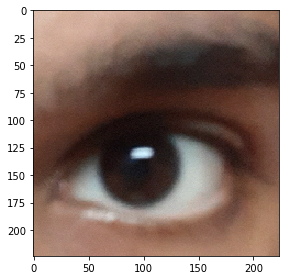

[0. 0. 0. 1.]


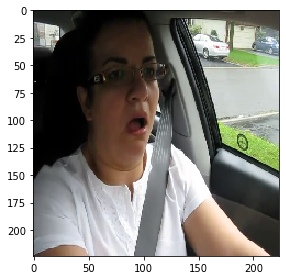

[1. 0. 0. 0.]


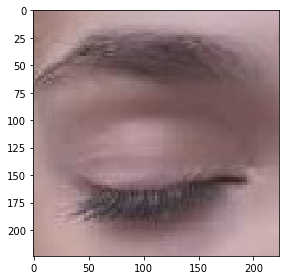

[0. 1. 0. 0.]


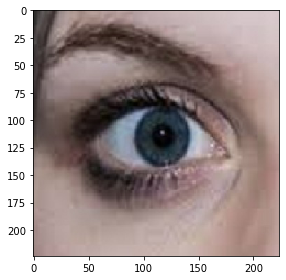

[1. 0. 0. 0.]


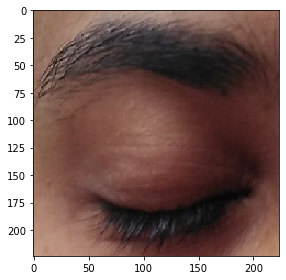

[0. 0. 0. 1.]


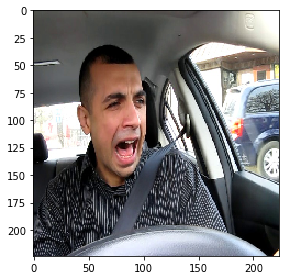

[1. 0. 0. 0.]


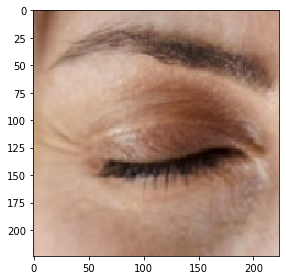

[0. 0. 1. 0.]


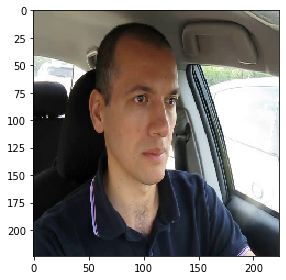

[0. 0. 1. 0.]


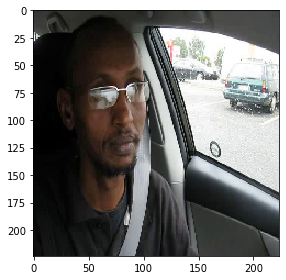

[1. 0. 0. 0.]


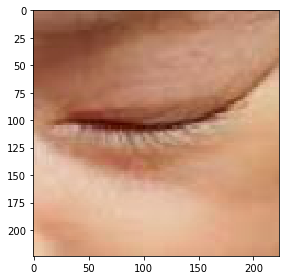

[1. 0. 0. 0.]


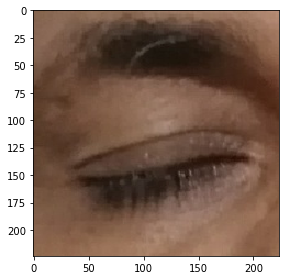

[0. 0. 0. 1.]


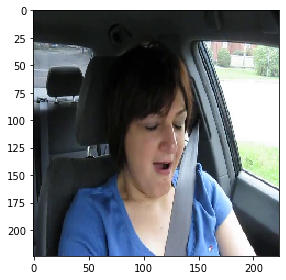

[0. 0. 1. 0.]


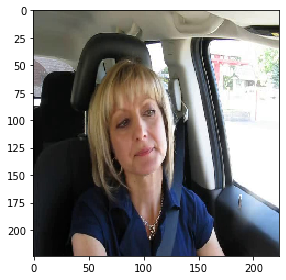

[0. 1. 0. 0.]


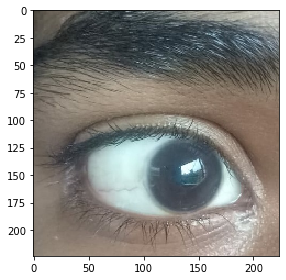

[0. 0. 1. 0.]


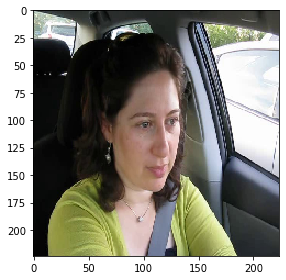

[0. 1. 0. 0.]


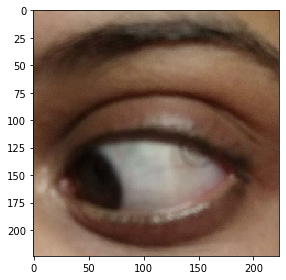

[0. 0. 0. 1.]


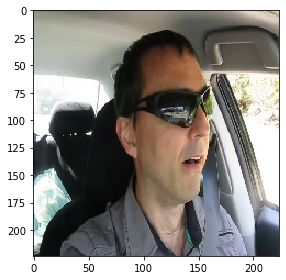

[1. 0. 0. 0.]


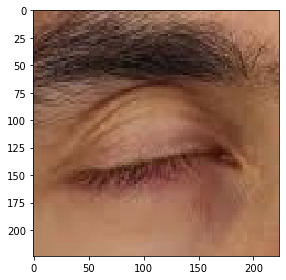

[1. 0. 0. 0.]


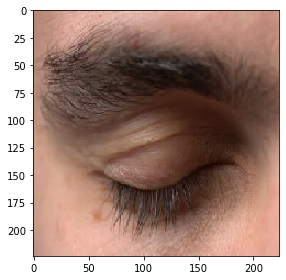

[0. 1. 0. 0.]


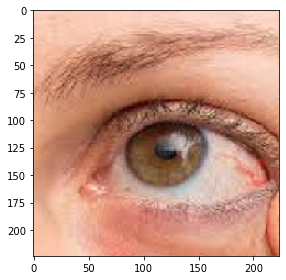

[1. 0. 0. 0.]


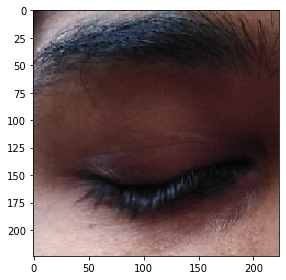

[1. 0. 0. 0.]


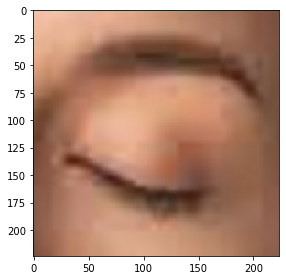

[0. 1. 0. 0.]


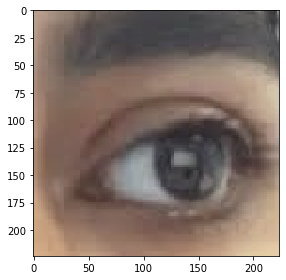

[1. 0. 0. 0.]


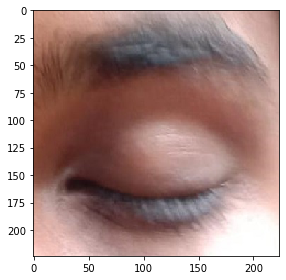

[0. 0. 1. 0.]


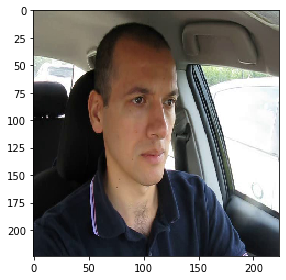

[0. 1. 0. 0.]


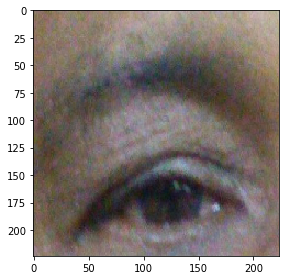

[1. 0. 0. 0.]


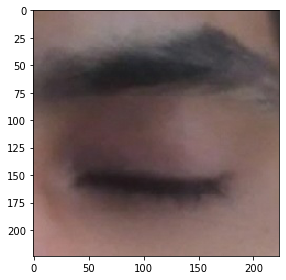

[0. 1. 0. 0.]


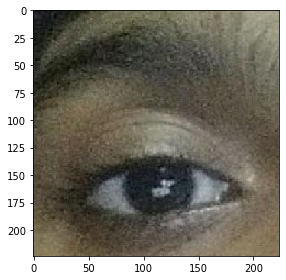

[0. 0. 0. 1.]


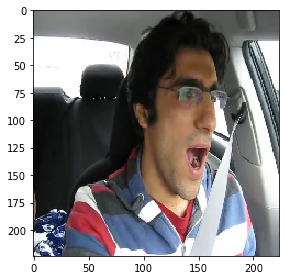

[0. 0. 0. 1.]


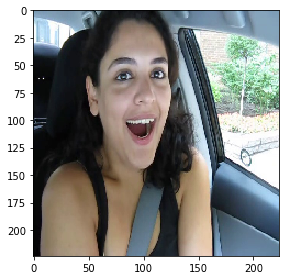

[0. 1. 0. 0.]


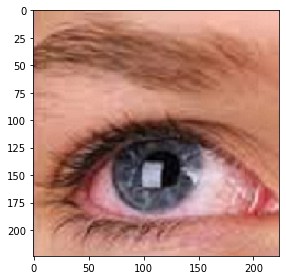

[0. 1. 0. 0.]


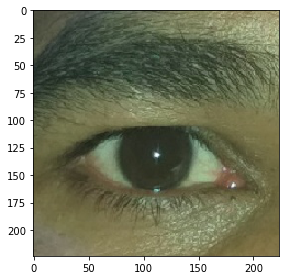

In [6]:
image_batch,label_batch = train_batch.next()
print(len(image_batch))

for i in range(0, len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [7]:
print(train_batch.class_indices)

{'Closed': 0, 'Open': 1, 'no_yawn': 2, 'yawn': 3}


## CNN

In [8]:
cnn_model = Sequential([
    Conv2D(32, kernel_size = (3, 3), activation = 'relu', 
           input_shape = (224,224,3)),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(4, activation = 'softmax')
])

In [9]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [10]:
cnn_model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [11]:
cnn_model.fit(x = train_batch, 
          steps_per_epoch = SPE, 
          validation_data = valid_batch, 
          validation_steps = VS, 
          epochs = 10, verbose = 1 )

Epoch 1/10
77/77 [==============================] - 103s 1s/step - loss: 0.8944 - accuracy: 0.6078 - val_loss: 0.4676 - val_accuracy: 0.8053
Epoch 2/10
77/77 [==============================] - 100s 1s/step - loss: 0.4568 - accuracy: 0.7852 - val_loss: 0.3549 - val_accuracy: 0.8149
Epoch 3/10
77/77 [==============================] - 99s 1s/step - loss: 0.3768 - accuracy: 0.8099 - val_loss: 0.3611 - val_accuracy: 0.8149
Epoch 4/10
77/77 [==============================] - 103s 1s/step - loss: 0.3420 - accuracy: 0.8353 - val_loss: 0.3141 - val_accuracy: 0.8389
Epoch 5/10
77/77 [==============================] - 100s 1s/step - loss: 0.3442 - accuracy: 0.8444 - val_loss: 0.3359 - val_accuracy: 0.8245
Epoch 6/10
77/77 [==============================] - 97s 1s/step - loss: 0.2858 - accuracy: 0.8653 - val_loss: 0.2741 - val_accuracy: 0.8774
Epoch 7/10
77/77 [==============================] - 104s 1s/step - loss: 0.2453 - accuracy: 0.8883 - val_loss: 0.2532 - val_accuracy: 0.8750
Epoch 8/10
77/7

In [12]:
cnn_acc = cnn_model.evaluate(valid_batch)

14/14 [==============================] - 5s 338ms/step - loss: 0.2017 - accuracy: 0.9122


## VGG16

In [13]:
from keras.applications import VGG16
from keras.models import Model

In [14]:
base_model = VGG16(weights='imagenet', 
                   include_top=False, input_shape=(224, 224, 3))

In [15]:
for layer in base_model.layers:
    layer.trainable = False

In [16]:
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4, activation='softmax')(x)

In [17]:
vgg_model = Model(inputs=base_model.input, outputs=x)

In [18]:
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
vgg_model.fit(x = train_batch, 
          steps_per_epoch = SPE, 
          validation_data = valid_batch, 
          validation_steps = VS, 
          epochs = 10, verbose = 1)

Epoch 1/10
40/77 [==============>...............] - ETA: 3:41 - loss: 1.7056 - accuracy: 0.6827

In [ ]:
vgg_acc = vgg_model.evaluate(valid_batch)

## InceptionV3

In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)

In [ ]:
x = Dense(1024, activation='relu')(x)

In [ ]:
predictions = Dense(4, activation='softmax')(x)

In [ ]:
inc_model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
inc_model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
inc_model.fit(x = train_batch, 
          steps_per_epoch = SPE, 
          validation_data = valid_batch, 
          validation_steps = VS, 
          epochs = 10, verbose = 1)

In [ ]:
inc_acc = inc_model.evaluate(valid_batch)

## Model Comparison

In [ ]:
plt.plot(cnn_acc, label='CNN')
plt.plot(vgg_acc, label='VGG16')
plt.plot(inc_acc, label='InceptionV3')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## DETECTOR SYSTEM

In [ ]:
import cv2
import os
from keras.models import load_model
import numpy as np
from pygame import mixer
import time

In [ ]:
mixer.init()
sound = mixer.Sound("Drowsiness detection/alarm.wav")

In [ ]:
face = cv2.CascadeClassifier('Drowsiness detection/haar cascade files/haarcascade_frontalface_alt.xml')
leye = cv2.CascadeClassifier('Drowsiness detection/haar cascade files/haarcascade_lefteye_2splits.xml')
reye = cv2.CascadeClassifier('Drowsiness detection/haar cascade files/haarcascade_righteye_2splits.xml')

In [ ]:
face.empty()

In [ ]:
leye.empty()

In [ ]:
reye.empty()

In [ ]:
lbl = ['Close','Open']

In [ ]:
path = os.getcwd()
parent_folder = os.path.join(path, "Drowsiness detection")
image_folder = os.path.join(parent_folder, "Captured images")
if not os.path.exists(image_folder):
    os.makedirs(image_folder)
    
cap = cv2.VideoCapture(0)
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
count = 0
score = 0
thicc = 2
rpred = [99]
lpred = [99]

counter = 0

while(True):
    ret, frame = cap.read()
    height,width = frame.shape[:2] 

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = face.detectMultiScale(gray, minNeighbors = 5, scaleFactor = 1.1, minSize = (25,25))
    left_eye = leye.detectMultiScale(gray)
    right_eye =  reye.detectMultiScale(gray)

    cv2.rectangle(frame, (0,height-50), (200,height), (0,0,0), thickness = cv2.FILLED )

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x,y), (x + w, y + h), (100, 100, 100), 1)

    for (x, y, w, h) in right_eye:
        r_eye = frame[y : y + h, x : x + w]
        count = count + 1
        r_eye = cv2.cvtColor(r_eye, cv2.COLOR_BGR2GRAY)
        r_eye = cv2.resize(r_eye, (24,24))
        r_eye = r_eye / 255
        r_eye = r_eye.reshape(24, 24, -1)                     #model.predict(r_eye)   
        r_eye = np.expand_dims(r_eye, axis=0)
        rpred = np.argmax(vgg_model.predict(r_eye), axis=1)                      #np.argmax(model.predict(x_test),axis=1)
        if(rpred[0] == 1):
            lbl = 'Open' 
        if(rpred[0] == 0):
            lbl = 'Closed'
        break

    for (x, y, w, h) in left_eye:
        l_eye = frame[y : y + h, x : x + w]
        count = count + 1
        l_eye = cv2.cvtColor(l_eye, cv2.COLOR_BGR2GRAY)  
        l_eye = cv2.resize(l_eye, (24, 24))
        l_eye = l_eye / 255
        l_eye = l_eye.reshape(24, 24, -1)
        l_eye = np.expand_dims(l_eye, axis = 0)
        lpred = np.argmax(vgg_model.predict(l_eye), axis=1)  
        if(lpred[0] == 1):
            lbl = 'Open'   
        if(lpred[0] == 0):
            lbl = 'Closed'
        break

    if(rpred[0] == 0 and lpred[0] == 0):
        score = score + 1
        cv2.putText(frame, "Closed", (10, height - 20), font, 1, (255, 255, 255), 1, cv2.LINE_AA)
    
    else:
        score = score - 1
        cv2.putText(frame, "Open", (10, height - 20), font, 1, (255, 255, 255), 1, cv2.LINE_AA)
    
    if(score < 0):
        score = 0   
    cv2.putText(frame, 'Score:' + str(score), (100, height - 20), font, 1, (255, 255, 255), 1, cv2.LINE_AA)
    
    if rpred[0] == 0 and lpred[0] == 0 and score > 15:
        counter = counter +1
        cv2.imwrite(os.path.join(image_folder, 'image'+str(counter)+'.jpg'), frame)
        try:
            sound.play()
            
        except:  # isplaying = False
            pass
        if(thicc < 16):
            thicc = thicc + 2
        else:
            thicc = thicc - 2
            if(thicc < 2):
                thicc = 2
        cv2.rectangle(frame, (0, 0), (width, height), (0, 0, 255), thicc) 
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()